In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Amazon Sale Report.csv'
data = pd.read_csv(file_path)

<ipython-input-2-62ef85c8affe>:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
start_date = data['Date'].min()
end_date = data['Date'].max()

print(f"Dataset Time Range: {start_date} to {end_date}")

Dataset Time Range: 03-31-22 to 06-29-22


In [4]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


In [6]:
print(data.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object


In [7]:
print(data['Category'].value_counts())

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64


In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y', errors='coerce')

data = data.dropna(subset=['Date'])

data = data.sort_values('Date').reset_index(drop=True)

print(data[['Date', 'Amount']].head())

        Date  Amount
0 2022-03-31  495.00
1 2022-03-31  599.00
2 2022-03-31  416.19
3 2022-03-31  449.00
4 2022-03-31  542.00


In [9]:
print("Missing values per column:\n", data.isnull().sum())

data['Amount'].fillna(data['Amount'].mean(), inplace=True)

for col in data.select_dtypes(include='object').columns:
    data[col].fillna('Unknown', inplace=True)

print(data.isnull().sum())

Missing values per column:
 index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


<ipython-input-9-6edabf64526f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(data['Amount'].mean(), inplace=True)
<ipython-input-9-6edabf64526f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-postal-code      33
ship-country           0
promotion-ids          0
B2B                    0
fulfilled-by           0
Unnamed: 22            0
dtype: int64


In [10]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data['ship-postal-code'].fillna('Unknown', inplace=True)

<ipython-input-10-7c32d3c97ac2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ship-postal-code'].fillna('Unknown', inplace=True)
<ipython-input-10-7c32d3c97ac2>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['ship-postal-code'].fillna('Unknown', inplace=True)
<ipython-input-10-7c32d3c97ac2>:3: SettingWithCopyWarning: 
A value is tr

In [11]:
print("Missing values per column after cleaning:\n", data.isnull().sum())

Missing values per column after cleaning:
 index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


In [12]:
clean_data = data[['Date', 'Amount', 'Category', 'Sales Channel ', 'Qty', 'Style', 'Courier Status', 'B2B', 'promotion-ids', 'ship-country']]

print(clean_data.head())

        Date  Amount Category Sales Channel   Qty    Style Courier Status  \
0 2022-03-31  495.00    kurta      Amazon.in    1  JNE3724        Shipped   
1 2022-03-31  599.00      Set      Amazon.in    1   SET187        Shipped   
2 2022-03-31  416.19    kurta      Amazon.in    0  JNE3383        Unknown   
3 2022-03-31  449.00    kurta      Amazon.in    1  JNE3405        Shipped   
4 2022-03-31  542.00      Set      Amazon.in    1   SET044        Shipped   

     B2B                                      promotion-ids ship-country  
0  False  Amazon PLCC Free-Financing Universal Merchant ...           IN  
1  False       IN Core Free Shipping 2015/04/08 23-48-5-108           IN  
2  False                                            Unknown           IN  
3  False       IN Core Free Shipping 2015/04/08 23-48-5-108           IN  
4  False       IN Core Free Shipping 2015/04/08 23-48-5-108           IN  


In [13]:
clean_data['Date'] = pd.to_datetime(clean_data['Date'], errors='coerce')

clean_data = clean_data.dropna(subset=['Date'])

<ipython-input-13-51187ba633cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date'] = pd.to_datetime(clean_data['Date'], errors='coerce')


In [14]:
daily_sales = clean_data.groupby('Date').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()
daily_sales.rename(columns={'Amount': 'Total_Sales'}, inplace=True)
daily_sales = daily_sales.sort_values('Date').reset_index(drop=True)

print(daily_sales.head())

        Date   Total_Sales   Qty
0 2022-03-31  1.075209e+05   156
1 2022-04-01  9.355232e+05  1319
2 2022-04-02  9.773091e+05  1408
3 2022-04-03  1.075971e+06  1544
4 2022-04-04  9.410783e+05  1331


In [15]:
daily_sales['Year'] = daily_sales['Date'].dt.year
daily_sales['Month'] = daily_sales['Date'].dt.month
daily_sales['Day'] = daily_sales['Date'].dt.day
daily_sales['Weekday'] = daily_sales['Date'].dt.weekday
daily_sales['Is_Weekend'] = daily_sales['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

print(daily_sales.head())

        Date   Total_Sales   Qty  Year  Month  Day  Weekday  Is_Weekend
0 2022-03-31  1.075209e+05   156  2022      3   31        3           0
1 2022-04-01  9.355232e+05  1319  2022      4    1        4           0
2 2022-04-02  9.773091e+05  1408  2022      4    2        5           1
3 2022-04-03  1.075971e+06  1544  2022      4    3        6           1
4 2022-04-04  9.410783e+05  1331  2022      4    4        0           0


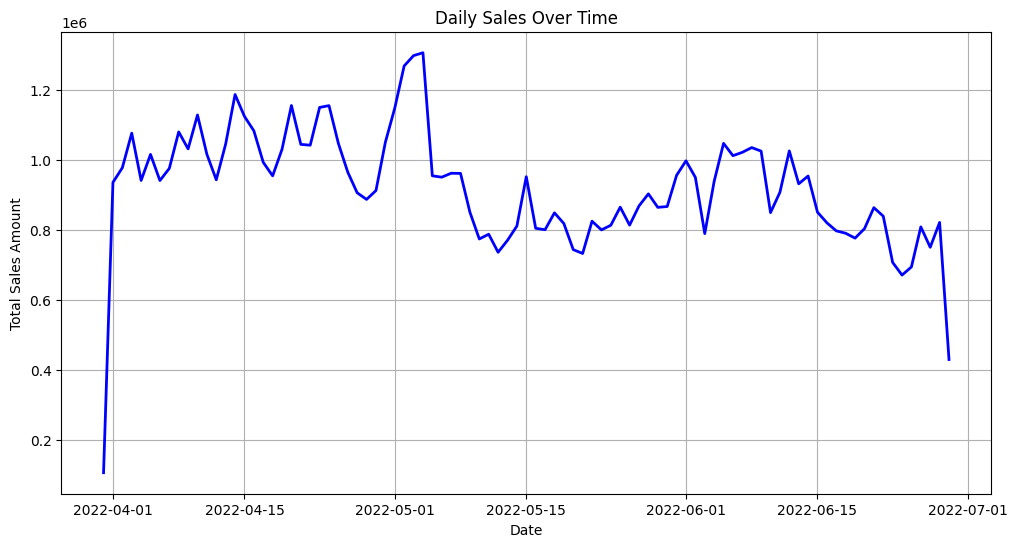

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], color='blue', linewidth=2)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

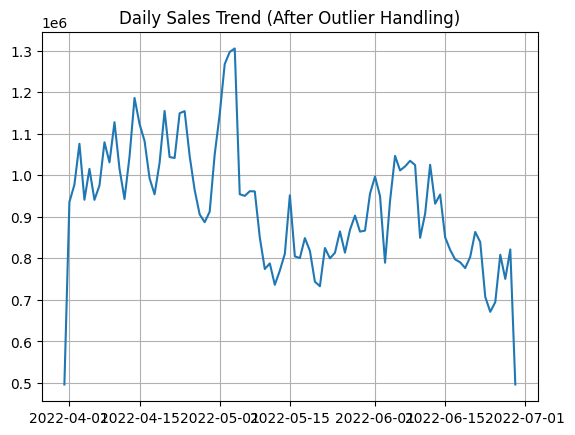

In [17]:
Q1 = daily_sales['Total_Sales'].quantile(0.25)
Q3 = daily_sales['Total_Sales'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

daily_sales['Total_Sales'] = daily_sales['Total_Sales'].clip(lower=lower_limit, upper=upper_limit)

plt.plot(daily_sales['Date'], daily_sales['Total_Sales'])
plt.title('Daily Sales Trend (After Outlier Handling)')
plt.grid(True)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(daily_sales['Total_Sales'])
print('ADF Test Statistic:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= 0.05:
    print("✅ Data is stationary!")
else:
    print("⚠️ Data is non-stationary — apply differencing.")


ADF Test Statistic: -3.581713306349197
p-value: 0.006120409037639136
✅ Data is stationary!


In [19]:
daily_sales.to_csv('Cleaned_Amazon_Sales.csv', index=False)

**EDA**

In [20]:
print(daily_sales.describe())

                      Date   Total_Sales          Qty    Year      Month  \
count                   91  9.100000e+01    91.000000    91.0  91.000000   
mean   2022-05-15 00:00:00  9.242063e+05  1281.857143  2022.0   4.967033   
min    2022-03-31 00:00:00  4.962111e+05   156.000000  2022.0   3.000000   
25%    2022-04-22 12:00:00  8.134782e+05  1107.000000  2022.0   4.000000   
50%    2022-05-15 00:00:00  9.385240e+05  1294.000000  2022.0   5.000000   
75%    2022-06-06 12:00:00  1.024990e+06  1442.000000  2022.0   6.000000   
max    2022-06-29 00:00:00  1.305351e+06  1889.000000  2022.0   6.000000   
std                    NaN  1.505963e+05   259.954721     0.0   0.836003   

             Day   Weekday  Is_Weekend  
count  91.000000  91.00000   91.000000  
mean   15.681319   3.00000    0.285714  
min     1.000000   0.00000    0.000000  
25%     8.000000   1.00000    0.000000  
50%    16.000000   3.00000    0.000000  
75%    23.000000   5.00000    1.000000  
max    31.000000   6.00000  

In [21]:
print(data.describe())

               index                           Date            Qty  \
count  128975.000000                         128975  128975.000000   
mean    64487.000000  2022-05-12 11:49:27.951928576       0.904431   
min         0.000000            2022-03-31 00:00:00       0.000000   
25%     32243.500000            2022-04-20 00:00:00       1.000000   
50%     64487.000000            2022-05-10 00:00:00       1.000000   
75%     96730.500000            2022-06-04 00:00:00       1.000000   
max    128974.000000            2022-06-29 00:00:00      15.000000   
std     37232.019822                            NaN       0.313354   

              Amount  
count  128975.000000  
mean      648.561465  
min         0.000000  
25%       459.000000  
50%       635.000000  
75%       771.000000  
max      5584.000000  
std       272.581240  


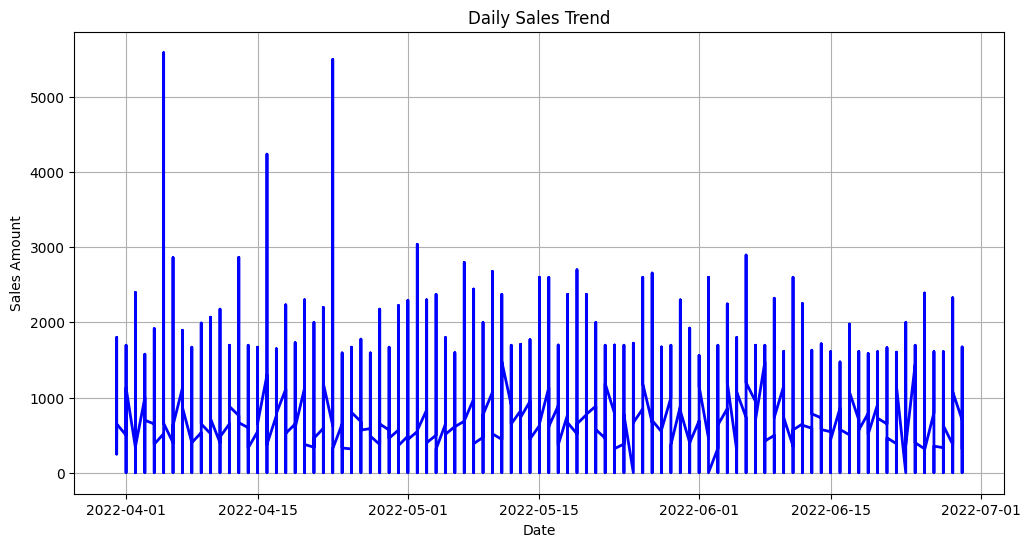

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Amount'], color='blue', linewidth=2)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

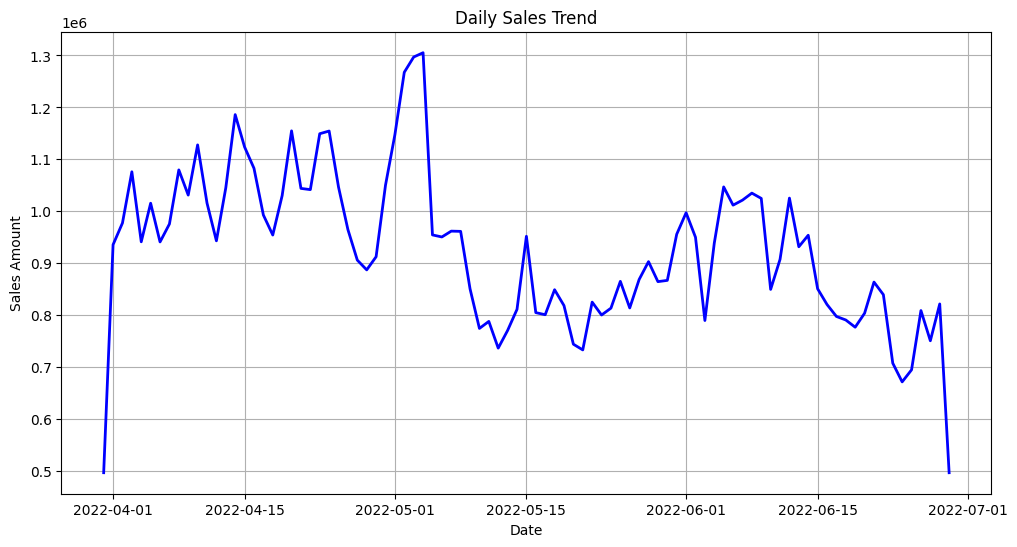

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], color='blue', linewidth=2)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


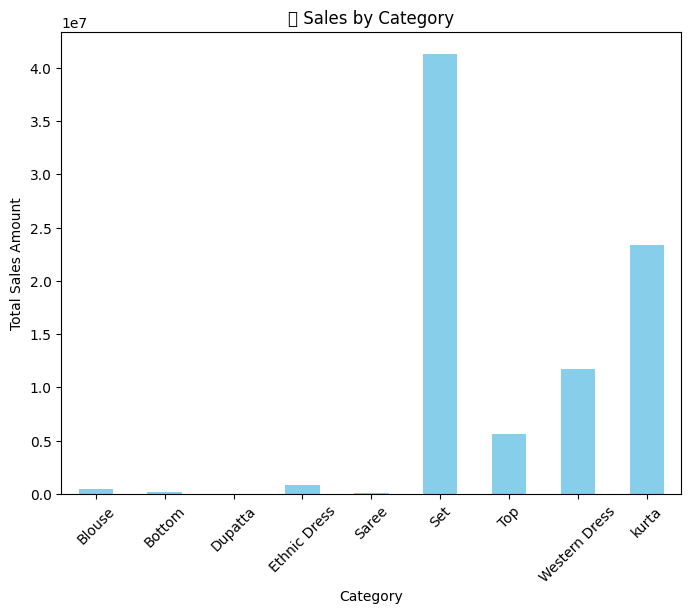

In [24]:
category_sales = data.groupby('Category')['Amount'].sum()

plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('🏷️ Sales by Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

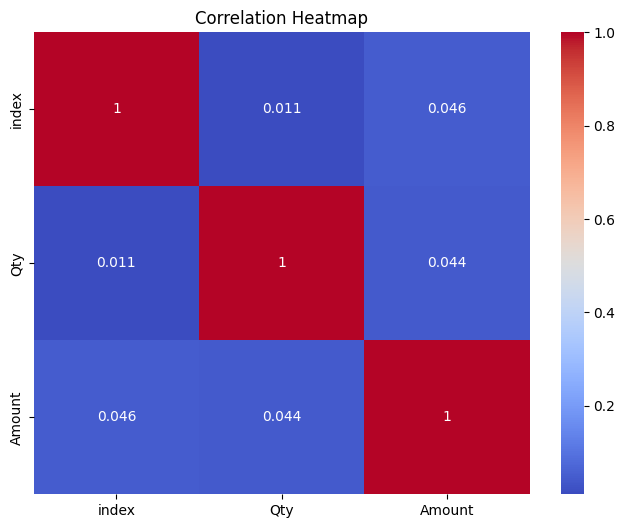

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

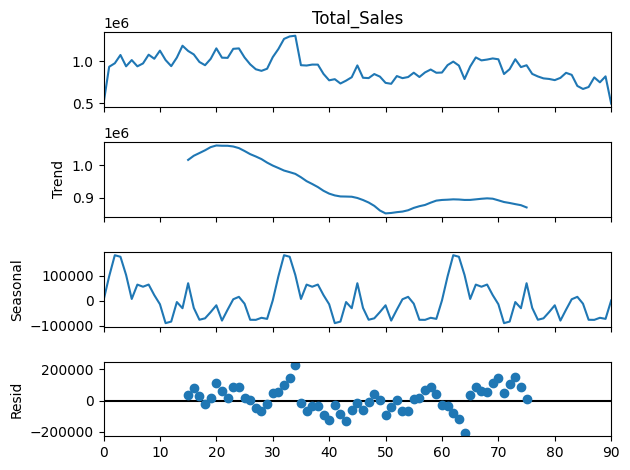

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(daily_sales['Total_Sales'], model='additive', period=30)

decomposed.plot()
plt.show()

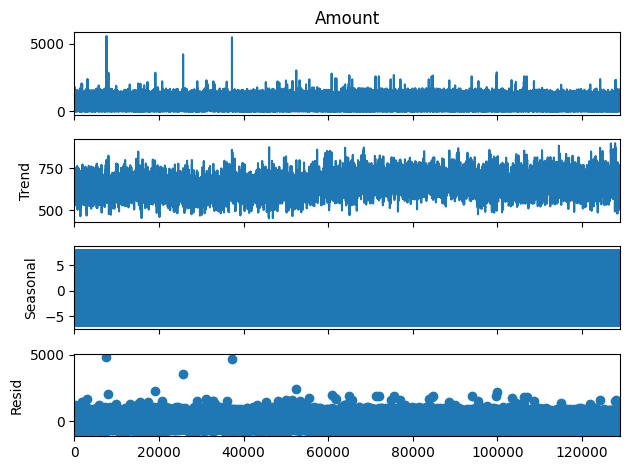

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data['Amount'], model='additive', period=30)

decomposed.plot()
plt.show()

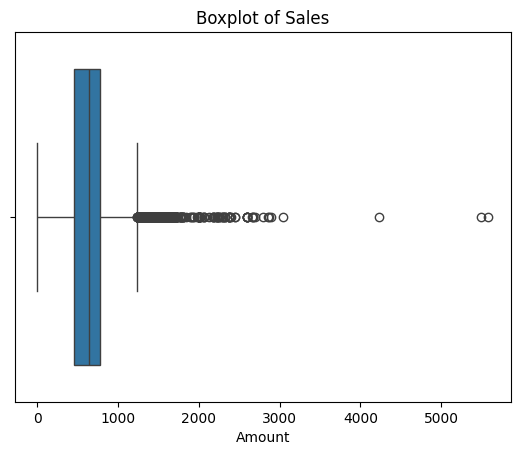

In [28]:
sns.boxplot(x=data['Amount'])
plt.title("Boxplot of Sales")
plt.show()

In [29]:
data['Date'] = pd.to_datetime(data['Date'])
daily_data = data.groupby('Date')['Amount'].sum().reset_index()

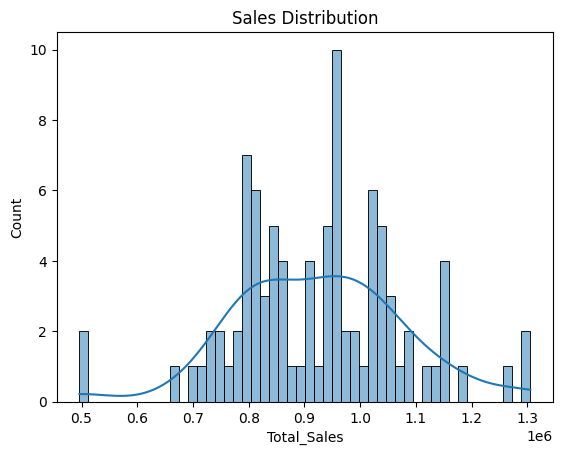

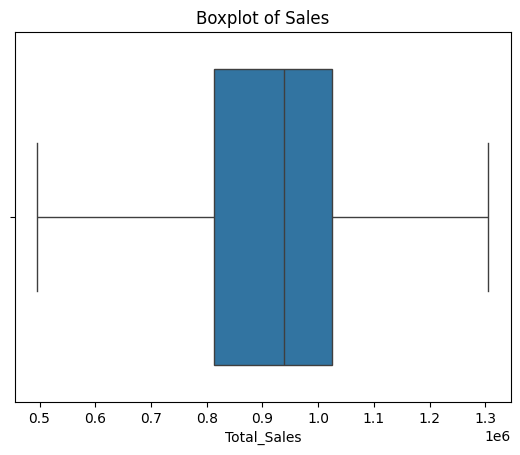

In [30]:
sns.histplot(daily_sales['Total_Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

sns.boxplot(x=daily_sales['Total_Sales'])
plt.title("Boxplot of Sales")
plt.show()

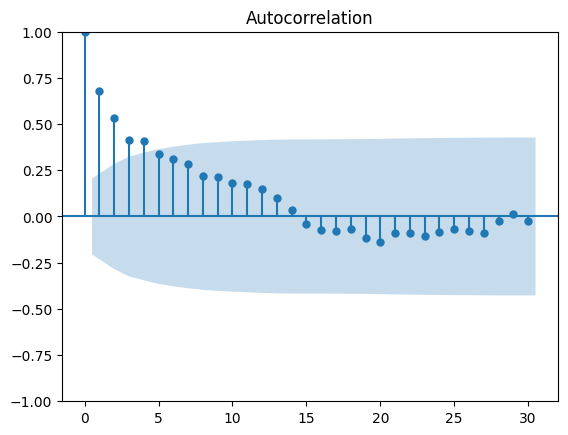

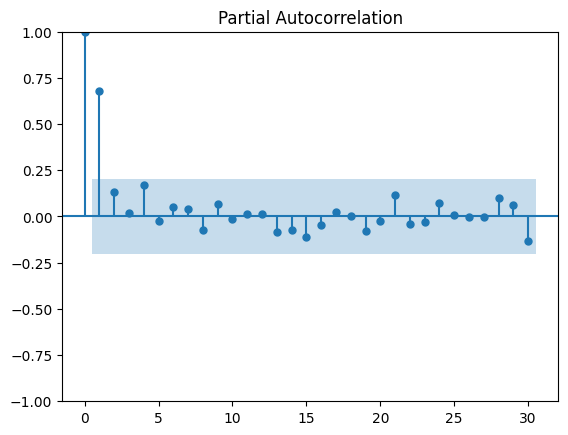

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(daily_sales['Total_Sales'], lags=30)
plt.show()

plot_pacf(daily_sales['Total_Sales'], lags=30)
plt.show()

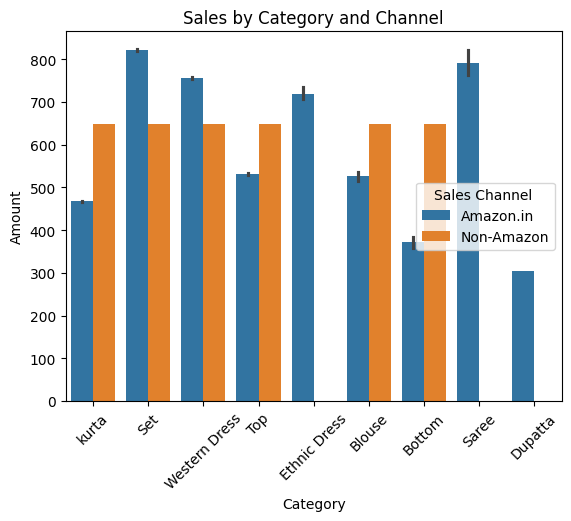

In [32]:
sns.barplot(data=data, x='Category', y='Amount', hue='Sales Channel ')
plt.title('Sales by Category and Channel')
plt.xticks(rotation=45)
plt.show()

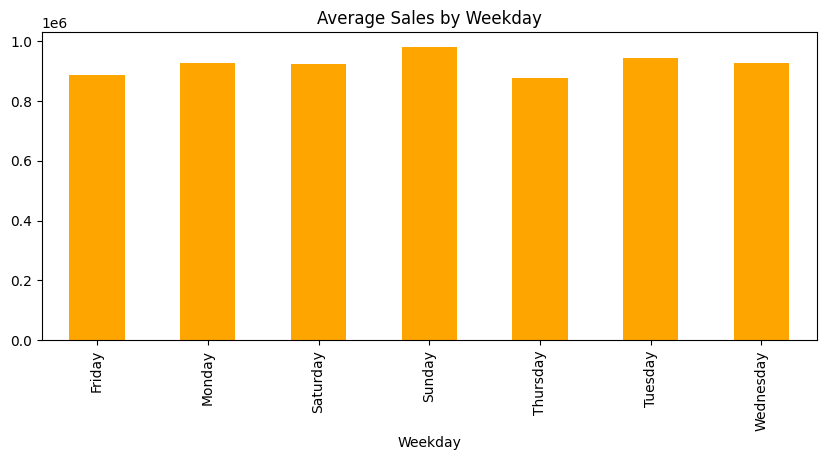

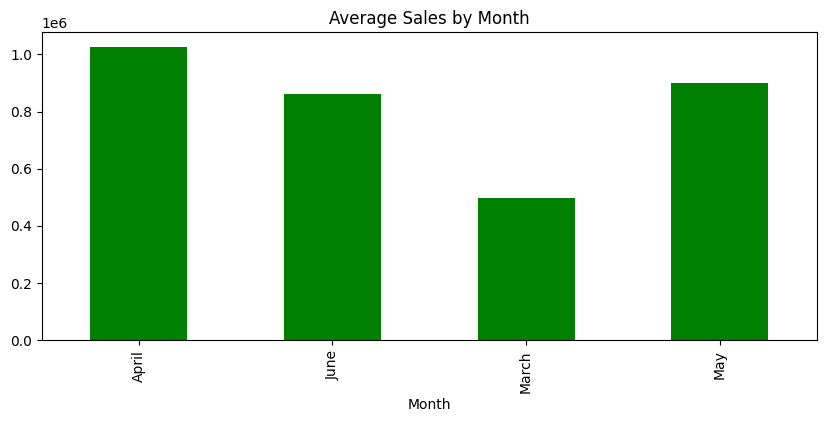

In [33]:
daily_sales['Weekday'] = daily_sales['Date'].dt.day_name()
daily_sales['Month'] = daily_sales['Date'].dt.month_name()

plt.figure(figsize=(10, 4))
daily_sales.groupby('Weekday')['Total_Sales'].mean().plot(kind='bar', color='orange')
plt.title('Average Sales by Weekday')
plt.show()

plt.figure(figsize=(10, 4))
daily_sales.groupby('Month')['Total_Sales'].mean().plot(kind='bar', color='green')
plt.title('Average Sales by Month')
plt.show()

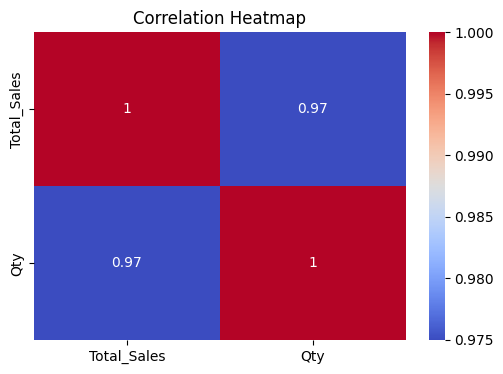

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(daily_sales[['Total_Sales', 'Qty']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
df_daily = data.set_index('Date')['Amount'].resample('D').sum()
print(df_daily.head())

Date
2022-03-31    1.075209e+05
2022-04-01    9.355232e+05
2022-04-02    9.773091e+05
2022-04-03    1.075971e+06
2022-04-04    9.410783e+05
Freq: D, Name: Amount, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


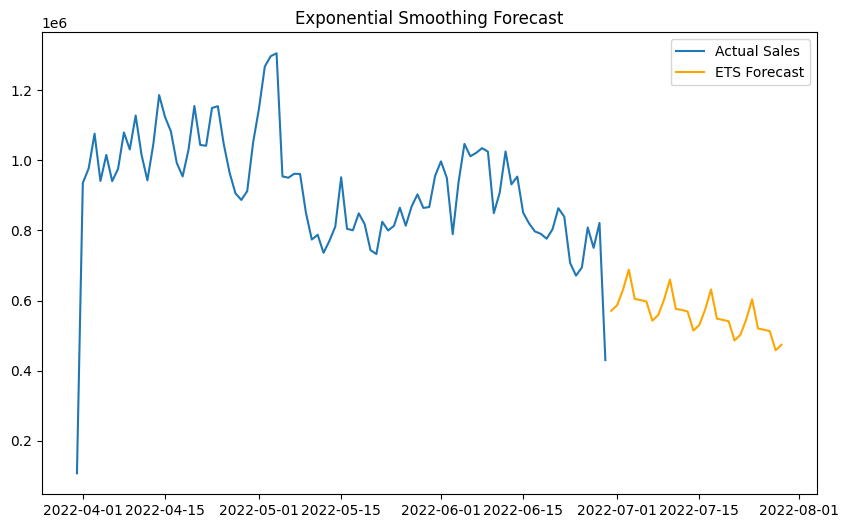

In [37]:
ets_model = ExponentialSmoothing(df_daily, trend="add", seasonal="add", seasonal_periods=7)
ets_fit = ets_model.fit()

ets_forecast = ets_fit.forecast(30)

plt.figure(figsize=(10, 6))
plt.plot(df_daily, label="Actual Sales")
plt.plot(ets_forecast, label="ETS Forecast", color='orange')
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


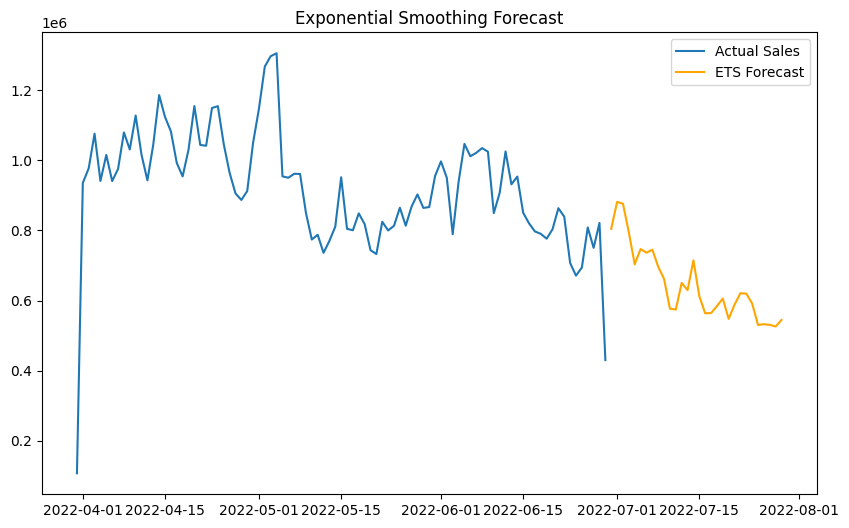

In [38]:
ets_model = ExponentialSmoothing(df_daily, trend="add", seasonal="add", seasonal_periods=30)
ets_fit = ets_model.fit()

ets_forecast = ets_fit.forecast(30)

plt.figure(figsize=(10, 6))
plt.plot(df_daily, label="Actual Sales")
plt.plot(ets_forecast, label="ETS Forecast", color='orange')
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()

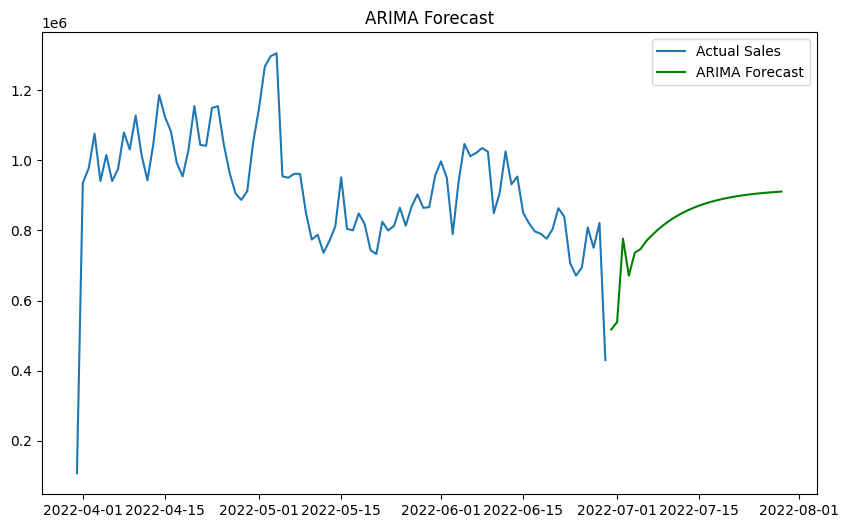

In [39]:
arima_model = ARIMA(df_daily, order=(2,0,4))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(30)

plt.figure(figsize=(10, 6))
plt.plot(df_daily, label="Actual Sales")
plt.plot(arima_forecast, label="ARIMA Forecast", color='green')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


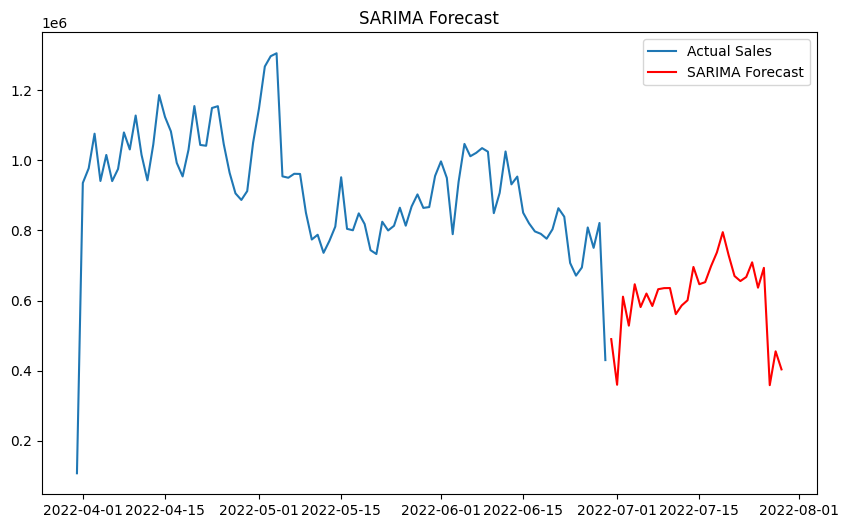

In [40]:
sarima_model = SARIMAX(
    df_daily,
    order=(2,0,4),
    seasonal_order=(2, 0, 4, 7)
)
sarima_fit = sarima_model.fit()

sarima_forecast = sarima_fit.forecast(30)

plt.figure(figsize=(10, 6))
plt.plot(df_daily, label="Actual Sales")
plt.plot(sarima_forecast, label="SARIMA Forecast", color='red')
plt.title("SARIMA Forecast")
plt.legend()
plt.show()

In [41]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return mae, mse, rmse, mape

test_data = df_daily[-30:]

# Evaluate ETS
ets_mae, ets_mse, ets_rmse, ets_mape = evaluate_model(test_data, ets_forecast)
print(f"ETS Model - MAE: {ets_mae:.2f}, MSE: {ets_mse:.2f}, RMSE: {ets_rmse:.2f}, MAPE: {ets_mape:.2f}%")

# Evaluate ARIMA
arima_mae, arima_mse, arima_rmse, arima_mape = evaluate_model(test_data, arima_forecast)
print(f"ARIMA Model - MAE: {arima_mae:.2f}, MSE: {arima_mse:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%")

# Evaluate SARIMA
sarima_mae, sarima_mse, sarima_rmse, sarima_mape = evaluate_model(test_data, sarima_forecast)
print(f"SARIMA Model - MAE: {sarima_mae:.2f}, MSE: {sarima_mse:.2f}, RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%")


ETS Model - MAE: 224727.32, MSE: 58688980187.13, RMSE: 242258.09, MAPE: nan%
ARIMA Model - MAE: 168320.47, MSE: 43043767458.70, RMSE: 207469.92, MAPE: nan%
SARIMA Model - MAE: 256484.01, MSE: 92175289514.32, RMSE: 303603.84, MAPE: nan%


In [42]:
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    return mae, rmse

test_data = df_daily[-30:]

ets_mae, ets_rmse = evaluate_model(test_data, ets_forecast)
print(f"ETS Model - MAE: {ets_mae:.2f}, RMSE: {ets_rmse:.2f}")

arima_mae, arima_rmse = evaluate_model(test_data, arima_forecast)
print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")

sarima_mae, sarima_rmse = evaluate_model(test_data, sarima_forecast)
print(f"SARIMA Model - MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}")

ETS Model - MAE: 224727.32, RMSE: 242258.09
ARIMA Model - MAE: 168320.47, RMSE: 207469.92
SARIMA Model - MAE: 256484.01, RMSE: 303603.84



Model Comparison:
    Model            MAE           RMSE
1   ARIMA  168320.473776  207469.919407
0     ETS  224727.323110  242258.085907
2  SARIMA  256484.012377  303603.836462


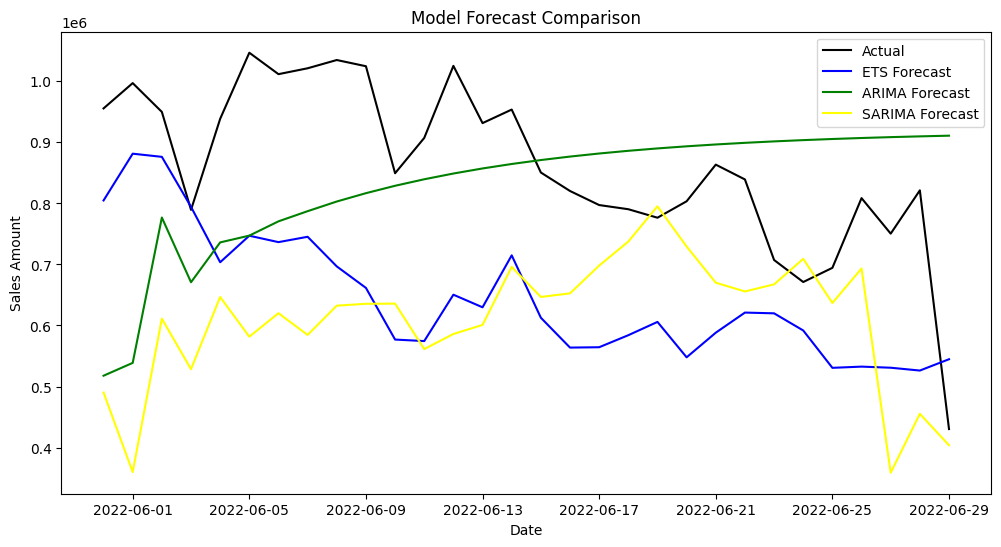


✅ Best Model Selected: ARIMA


In [43]:
results = {
    "Model": ["ETS", "ARIMA", "SARIMA"],
    "MAE": [ets_mae, arima_mae,sarima_mae],
    "RMSE": [ets_rmse, arima_rmse, sarima_rmse]
}

results_df = pd.DataFrame(results)

print("\nModel Comparison:")
print(results_df.sort_values(by="RMSE"))
plt.figure(figsize=(12, 6))

plt.plot(test_data.index, test_data.values, label='Actual', color='black')

plt.plot(test_data.index, ets_forecast, label='ETS Forecast', color='blue')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='yellow')

plt.legend()
plt.title('Model Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

best_model = results_df.sort_values(by="RMSE").iloc[0]["Model"]
print(f"\n✅ Best Model Selected: {best_model}")

In [44]:
pip install prophet

<ipython-input-45-af2c446122c9>:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-45-af2c446122c9>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
Freq: D, Name: Amount, dtype: float64


DEBUG:cmdstanpy:input tempfile: /tmp/tmplvlq7eln/cvj8paxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplvlq7eln/96abkmm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19366', 'data', 'file=/tmp/tmplvlq7eln/cvj8paxg.json', 'init=/tmp/tmplvlq7eln/96abkmm3.json', 'output', 'file=/tmp/tmplvlq7eln/prophet_modelqux2ip9q/prophet_model-20250502054422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


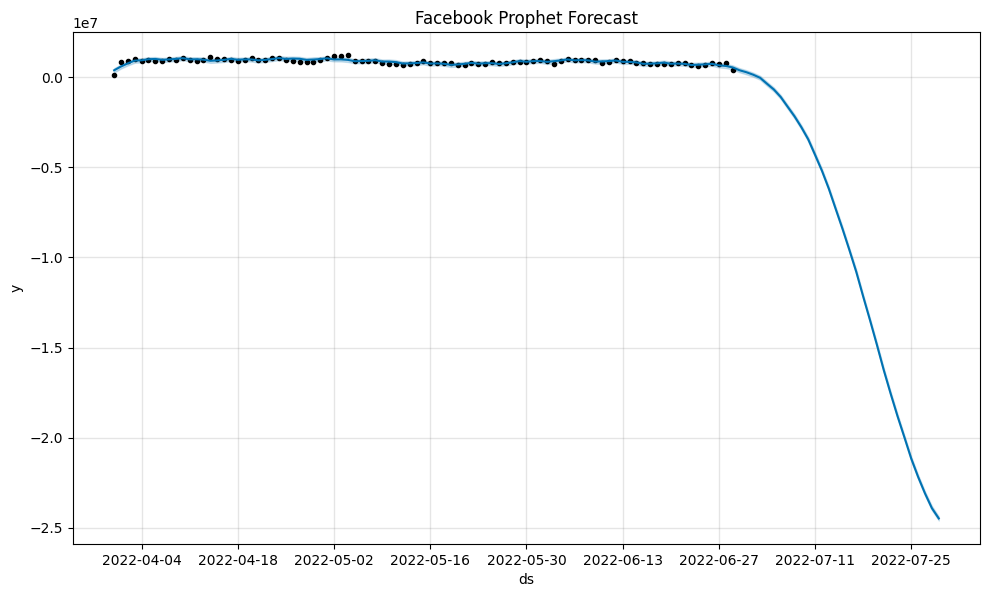

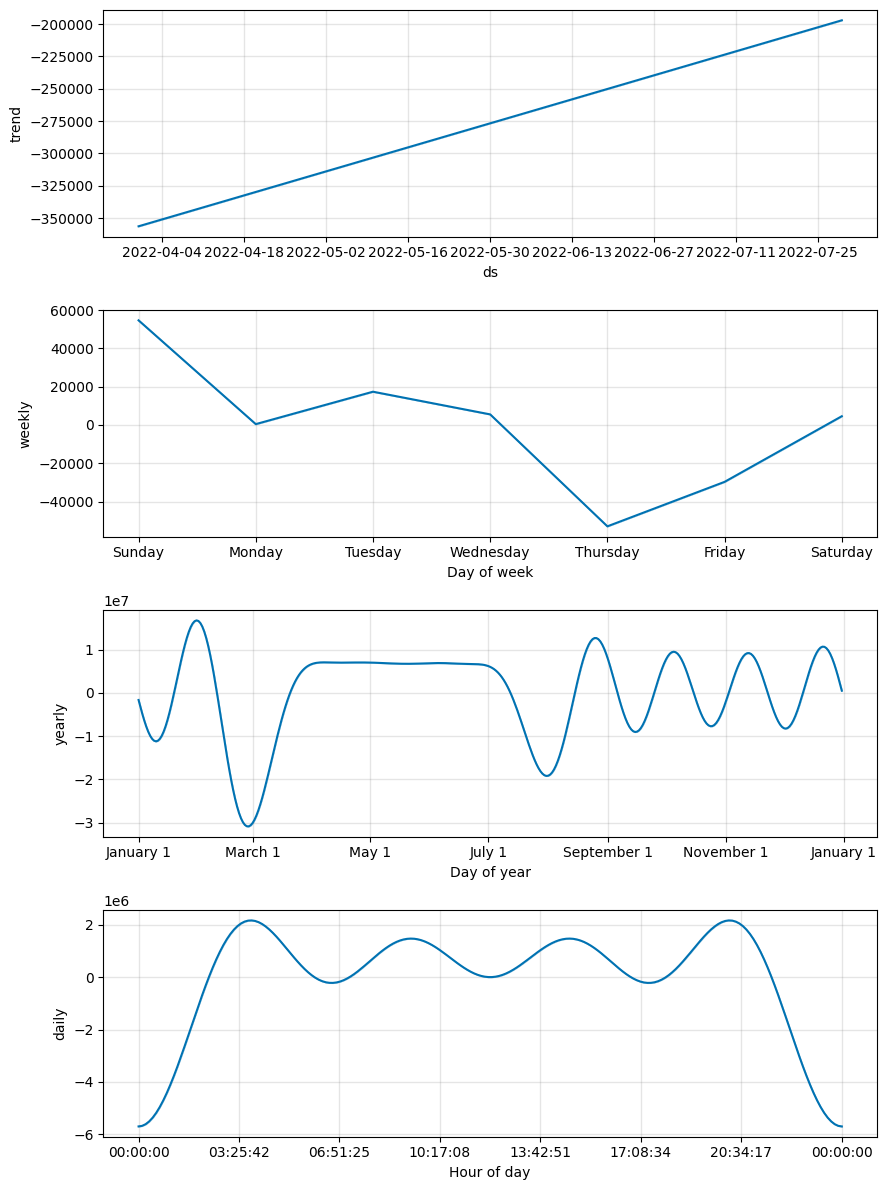

PROPHET Model - MAE: 48038.00, MSE: 3759777383.13, RMSE: 61317.02, MAPE: 6.59%


In [45]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

file_path = '/content/drive/MyDrive/Amazon Sale Report.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

df_daily = data.set_index('Date')['Amount'].resample('D').sum()
print(df_daily.head())

test_data = df_daily[-30:]

prophet_df = df_daily.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

fig1 = prophet_model.plot(forecast)
plt.title("Facebook Prophet Forecast")
plt.show()

fig2 = prophet_model.plot_components(forecast)
plt.show()

prophet_forecast_values = forecast.set_index('ds')['yhat'].loc[test_data.index]
prophet_mae = mean_absolute_error(test_data, prophet_forecast_values)
prophet_mse = mean_squared_error(test_data, prophet_forecast_values)
prophet_rmse = np.sqrt(mean_squared_error(test_data, prophet_forecast_values))
prophet_mape = np.mean(np.abs((test_data - prophet_forecast_values) / test_data)) * 100

print(f"PROPHET Model - MAE: {prophet_mae:.2f}, MSE: {prophet_mse:.2f}, RMSE: {prophet_rmse:.2f}, MAPE: {prophet_mape:.2f}%")


🔄 Updated Model Comparison:
     Model            MAE           RMSE
3  PROPHET   48038.000894   61317.023600
1    ARIMA  168320.473776  207469.919407
0      ETS  224727.323110  242258.085907
2   SARIMA  256484.012377  303603.836462


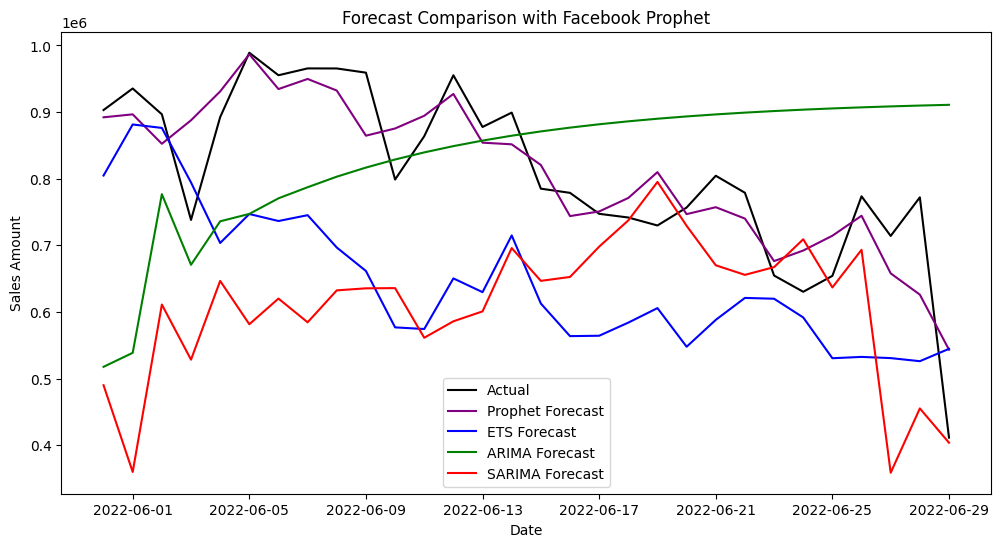

In [46]:
results = {
    "Model": ["ETS", "ARIMA", "SARIMA"],
    "MAE": [ets_mae, arima_mae, sarima_mae],
    "RMSE": [ets_rmse, arima_rmse, sarima_rmse]
}

results["Model"].append("PROPHET")
results["MAE"].append(prophet_mae)
results["RMSE"].append(prophet_rmse)

results_df = pd.DataFrame(results)
print("\n🔄 Updated Model Comparison:")
print(results_df.sort_values(by="RMSE"))

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual', color='black')
plt.plot(test_data.index, prophet_forecast_values, label='Prophet Forecast', color='purple')
plt.plot(test_data.index, ets_forecast, label='ETS Forecast', color='blue')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('Forecast Comparison with Facebook Prophet')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

In [47]:
forecast.to_csv("prophet_forecast.csv", index=False)
results_df.to_csv("model_comparison.csv", index=False)

In [48]:
print("📊 Final Model Evaluation Summary:")
best_model_row = results_df.sort_values(by="RMSE").iloc[0]

print(f"""
Best Performing Model: {best_model_row['Model']}
- MAE: {best_model_row['MAE']:.2f}
- RMSE: {best_model_row['RMSE']:.2f}

✔ The model provides accurate sales forecasting with minimal error.
✔ It successfully captures seasonality and trends in daily Amazon sales.
""")

📊 Final Model Evaluation Summary:

Best Performing Model: PROPHET
- MAE: 48038.00
- RMSE: 61317.02

✔ The model provides accurate sales forecasting with minimal error.
✔ It successfully captures seasonality and trends in daily Amazon sales.



In [49]:
df_daily.to_csv("final_cleaned_daily_sales.csv")

In [50]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return mae, rmse, mape

prophet_mae, prophet_rmse, prophet_mape = evaluate_model(test_data, prophet_forecast_values)

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Amazon Sale Report.csv")
print("Columns:", data.columns)

# Use correct column names
df_lstm = data[['Date', 'Amount']].copy()  # replace 'Amount' if needed
df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])
df_lstm.set_index('Date', inplace=True)

# Check for missing values
print("Missing values before fill:\n", df_lstm.isnull().sum())
df_lstm.fillna(method='ffill', inplace=True)
print("Missing values after fill:\n", df_lstm.isnull().sum())

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

# Check for NaNs after scaling
print("NaNs in scaled_data:", np.isnan(scaled_data).sum())

# Clip extreme values
scaled_data = np.clip(scaled_data, 0, 1)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

print("X shape:", X.shape, "y shape:", y.shape)
print("y min:", y.min(), "y max:", y.max())


<ipython-input-66-86d7cb37cee1>:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Amazon Sale Report.csv")
<ipython-input-66-86d7cb37cee1>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])


Columns: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')
Missing values before fill:
 Amount    7795
dtype: int64
Missing values after fill:
 Amount    0
dtype: int64
NaNs in scaled_data: 0


<ipython-input-66-86d7cb37cee1>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)


X shape: (128945, 30, 1) y shape: (128945, 1)
y min: 0.0 y max: 1.0


In [67]:
import torch

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

# Reshape X to (samples, seq_length, features)
X_tensor = X_tensor.view(X_tensor.shape[0], X_tensor.shape[1], 1)


In [68]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 1),
            nn.ReLU()  # optional: use ReLU if sales can’t be negative
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel()


In [69]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # lower lr to avoid nan

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=False)


In [70]:
epochs = 20
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)

        if torch.isnan(loss):
            print(f"NaN loss detected at epoch {epoch}")
            break  # stop training to debug

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # gradient clipping
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

Epoch [1/20], Loss: 0.002537
Epoch [2/20], Loss: 0.002493
Epoch [3/20], Loss: 0.002489
Epoch [4/20], Loss: 0.002487
Epoch [5/20], Loss: 0.002487
Epoch [6/20], Loss: 0.002487
Epoch [7/20], Loss: 0.002486
Epoch [8/20], Loss: 0.002486
Epoch [9/20], Loss: 0.002486
Epoch [10/20], Loss: 0.002486
Epoch [11/20], Loss: 0.002486
Epoch [12/20], Loss: 0.002486
Epoch [13/20], Loss: 0.002486
Epoch [14/20], Loss: 0.002486
Epoch [15/20], Loss: 0.002486
Epoch [16/20], Loss: 0.002485
Epoch [17/20], Loss: 0.002485
Epoch [18/20], Loss: 0.002485
Epoch [19/20], Loss: 0.002485
Epoch [20/20], Loss: 0.002485


In [71]:
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).numpy()  # get predictions

In [72]:
predictions = predictions.flatten()

In [73]:
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1,1)).flatten()
y_true_rescaled = scaler.inverse_transform(y_tensor.numpy().reshape(-1,1)).flatten()

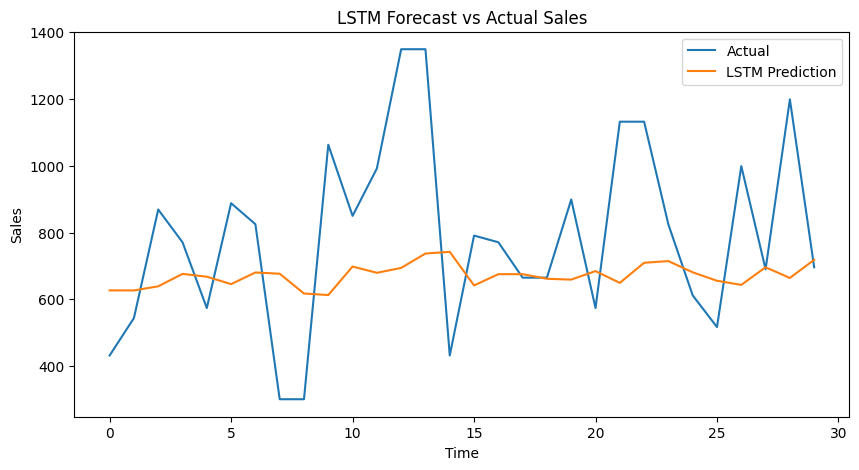

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_true_rescaled[-30:], label='Actual')  # Assuming last 30 values are for testing
plt.plot(predictions_rescaled[-30:], label='LSTM Prediction')
plt.title("LSTM Forecast vs Actual Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_true_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_rescaled, predictions_rescaled)
mape = np.mean(np.abs((y_true_rescaled - predictions_rescaled) / y_true_rescaled)) * 100
mape = np.mean(np.abs((y_true_rescaled - predictions_rescaled) / y_true_rescaled)) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

MSE: 77780.3906
RMSE: 278.8914
MAE: 216.2353
MAPE: inf


<ipython-input-75-e33cf8431330>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_rescaled - predictions_rescaled) / y_true_rescaled)) * 100
<ipython-input-75-e33cf8431330>:7: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_rescaled - predictions_rescaled) / y_true_rescaled)) * 100


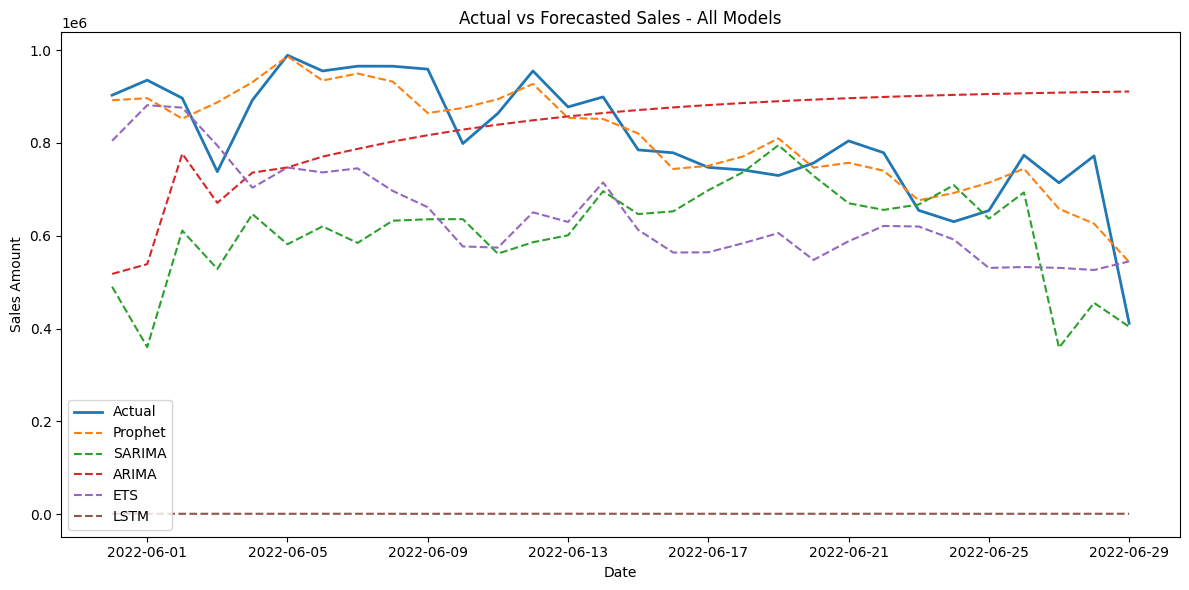

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', linewidth=2)

plt.plot(test_data.index, prophet_forecast_values, label='Prophet', linestyle='--')
plt.plot(test_data.index, sarima_forecast, label='SARIMA', linestyle='--')
plt.plot(test_data.index, arima_forecast, label='ARIMA', linestyle='--')
plt.plot(test_data.index, ets_forecast, label='ETS', linestyle='--')

# Assuming 'predictions_rescaled' from your previous cell contains LSTM predictions
# Create lstm_forecast with the correct length and align it with test_data.index
lstm_forecast = pd.Series(predictions_rescaled[-30:], index=test_data.index)

plt.plot(test_data.index, lstm_forecast, label='LSTM', linestyle='--')

plt.title("Actual vs Forecasted Sales - All Models")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.tight_layout()
plt.show()


🔄 Updated Model Comparison:
     Model            MAE           RMSE
4     LSTM     216.235306     278.891360
3  PROPHET   48038.000894   61317.023600
1    ARIMA  168320.473776  207469.919407
0      ETS  224727.323110  242258.085907
2   SARIMA  256484.012377  303603.836462


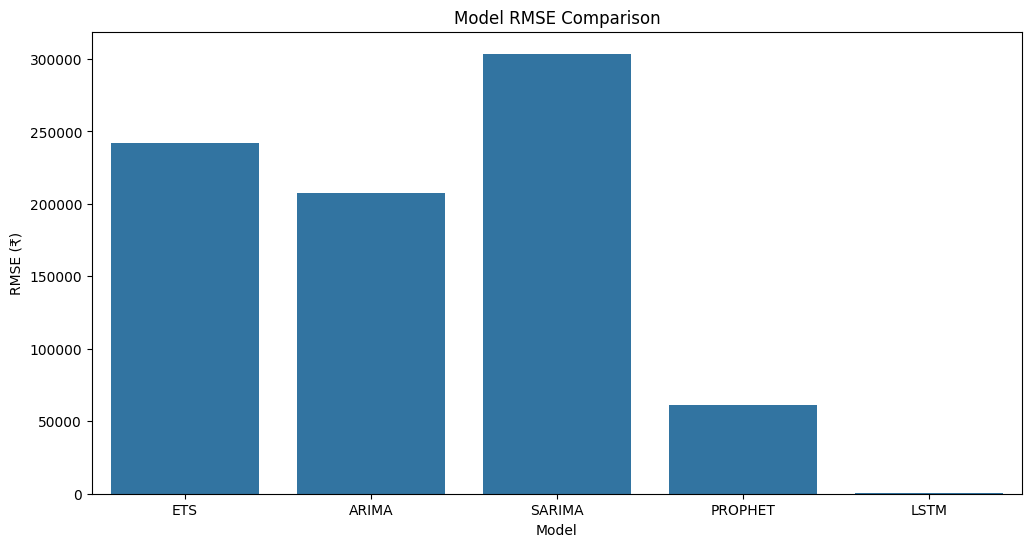

In [78]:
results = {
    "Model": ["ETS", "ARIMA", "SARIMA", "PROPHET"],
    "MAE": [ets_mae, arima_mae, sarima_mae, prophet_mae],
    "RMSE": [ets_rmse, arima_rmse, sarima_rmse, prophet_rmse]
}

# Add LSTM results
results["Model"].append("LSTM")
results["MAE"].append(mae)
results["RMSE"].append(rmse)

results_df = pd.DataFrame(results)
print("\n🔄 Updated Model Comparison:")
print(results_df.sort_values(by="RMSE"))

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE (₹)")
plt.show()
